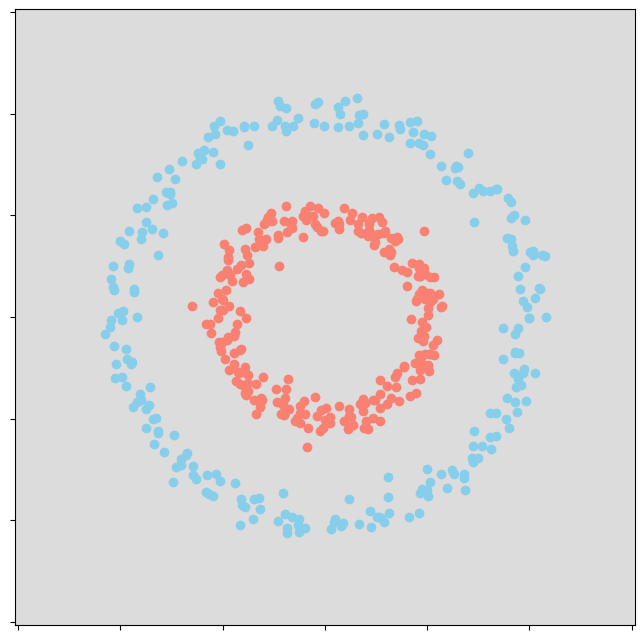

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)


Step 0 / 1000 - Loss =  0.4329591 - Acc = 0.5
Step 25 / 1000 - Loss =  0.35488102 - Acc = 0.56
Step 50 / 1000 - Loss =  0.2828708 - Acc = 0.602
Step 75 / 1000 - Loss =  0.17465273 - Acc = 0.748
Step 100 / 1000 - Loss =  0.14171763 - Acc = 0.832
Step 125 / 1000 - Loss =  0.12221019 - Acc = 0.852
Step 150 / 1000 - Loss =  0.10781724 - Acc = 0.888
Step 175 / 1000 - Loss =  0.09506099 - Acc = 0.902
Step 200 / 1000 - Loss =  0.08313202 - Acc = 0.922
Step 225 / 1000 - Loss =  0.07213115 - Acc = 0.93
Step 250 / 1000 - Loss =  0.0623795 - Acc = 0.944
Step 275 / 1000 - Loss =  0.054065797 - Acc = 0.956
Step 300 / 1000 - Loss =  0.047116704 - Acc = 0.97
Step 325 / 1000 - Loss =  0.041544706 - Acc = 0.98
Step 350 / 1000 - Loss =  0.037027482 - Acc = 0.986
Step 375 / 1000 - Loss =  0.033294275 - Acc = 0.994
Step 400 / 1000 - Loss =  0.030101337 - Acc = 0.998
Step 425 / 1000 - Loss =  0.027348127 - Acc = 0.998
Step 450 / 1000 - Loss =  0.02492932 - Acc = 1.0
Step 475 / 1000 - Loss =  0.02282726 - 

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

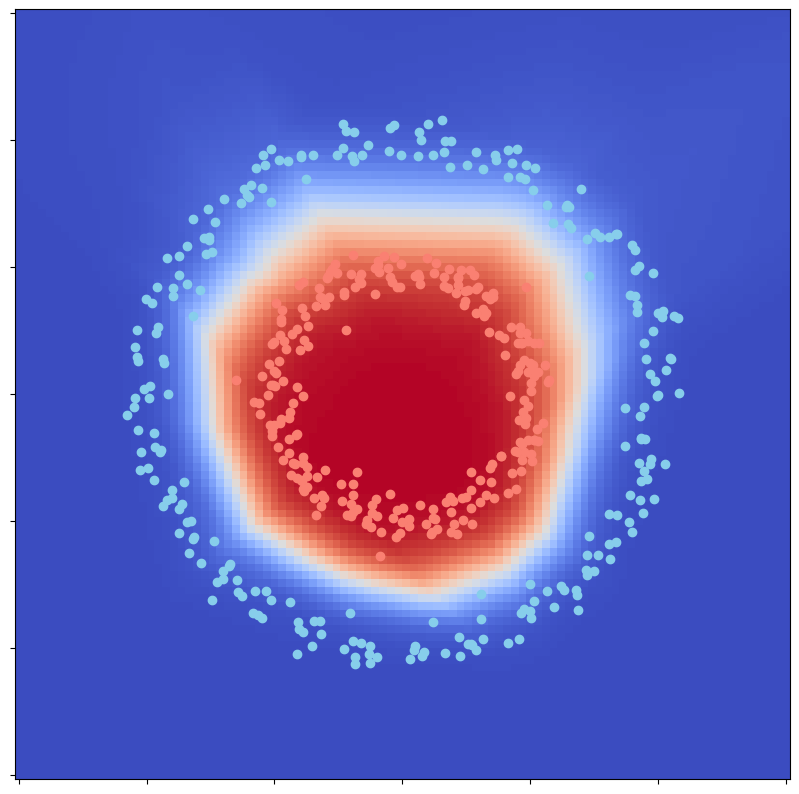

In [4]:
# Hay que cambiar la manera en al que se importa para que funcione
import tensorflow.compat.v1 as tf

from matplotlib import animation
from IPython import display

# Para que funcionen las cosas de la version 1
# Desde casa este esta mal: tf.disable_v2_behavior()
tf.compat.v1.disable_v2_behavior

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

# learning rate
lr = 0.01
# número de neuronas por capa.
nn = [2, 16, 8, 1]

# Capa 1
#   Array de pesos de la primera capa
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
#   Array de los bias de la primera capa
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

#   Al ser la primera capa no tiene datos de entrada, asi que cogemos los iX
#   Funcion de activacion
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
#   Array de pesos de la primera capa
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
#   Array de los bias de la primera capa
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

#   Funcion de activacion
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
#   Array de pesos de la segunda capa
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
#   Array de los bias de la segunda capa
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#   Vector de predicciones, no es l3 si no pY por que es la salida
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
# En casa este esta mal: optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

# Array con las imagenes
ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save("animation.mp4")

In [5]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)

C:\Users\HP\AppData\Local\Temp\ipykernel_2968\3504363068.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


NotImplementedError: numpy() is only available when eager execution is enabled.

SKlearn

In [7]:
import sklearn as sk
import sklearn.neural_network



lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.16403651
Iteration 2, loss = 0.13048993
Iteration 3, loss = 0.12858406
Iteration 4, loss = 0.12420644
Iteration 5, loss = 0.12266281
Iteration 6, loss = 0.12116166
Iteration 7, loss = 0.12013356
Iteration 8, loss = 0.11911266
Iteration 9, loss = 0.11777372
Iteration 10, loss = 0.11699723
Iteration 11, loss = 0.11542725
Iteration 12, loss = 0.11450081
Iteration 13, loss = 0.11334676
Iteration 14, loss = 0.11210080
Iteration 15, loss = 0.11089497
Iteration 16, loss = 0.10971686
Iteration 17, loss = 0.10840097
Iteration 18, loss = 0.10689035
Iteration 19, loss = 0.10540083
Iteration 20, loss = 0.10372141
Iteration 21, loss = 0.10171857
Iteration 22, loss = 0.09980807
Iteration 23, loss = 0.09783068
Iteration 24, loss = 0.09599980
Iteration 25, loss = 0.09432207
Iteration 26, loss = 0.09230653
Iteration 27, loss = 0.09064038
Iteration 28, loss = 0.08851158
Iteration 29, loss = 0.08654303
Iteration 30, loss = 0.08481816
Iteration 31, loss = 0.08220133
Iteration 32, los

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)